In [96]:
import pandas as pd
import requests
import re
import numpy as np
from datetime import datetime
import os
import matplotlib as plt
import matplotlib.pyplot as pxt

## GDP per Capita

In [2]:
gdp_df = pd.read_excel('gdp_per_capita.xls')
gdp_df = gdp_df.drop(['Indicator Name','Indicator Code', 'Country Code', '2017'], axis = 1)

In [3]:
gdp_df.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25921.026052,27546.899390,24631.434860,24271.940421,25324.720362,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,129.506654,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,569.577923,561.778746
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3308.700233
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4413.081697,4578.666728,3934.895394,4124.982390
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48582.808455,47785.659086,43339.379875,39736.354063,41098.766942,38391.080867,40619.711298,42294.994727,36038.267604,36988.622030


In [4]:
colonies_df = pd.read_csv('colonies_wikipedia.csv')
colonies_df = colonies_df.rename(columns={'colonized_country':'Country Name', 'colonizer_country': 'Colonizer'})
colonies_df = colonies_df.drop(['Unnamed: 0','ID', 'Day', 'Month', 'Year', 'URL'], axis = 1)
colonies_df.head()

,Country Name,Colonizer
0,Iceland,Denmark
1,Canada,United Kingdom
2,United States of America,United Kingdom
3,Haiti,France
4,Benin,France


In [5]:
result = pd.merge(colonies_df, gdp_df, on='Country Name')
result.head()

,Country Name,Colonizer,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Iceland,Denmark,1414.982269,1418.125870,1562.230730,1831.705656,2297.920643,2723.520950,3215.694178,3125.649492,...,68348.318170,55575.291961,40461.892506,41676.445273,46000.020171,44333.850176,47810.308882,52473.113565,50734.443597,59976.942565
1,Canada,United Kingdom,2294.568814,2231.293824,2255.230044,2354.839122,2529.518179,2739.585849,3010.705908,3173.076194,...,44544.526800,46596.335991,40773.454364,47447.476024,52082.210760,52496.694870,52413.721156,50440.433755,43315.700442,42157.927991
2,Haiti,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,615.819819,674.756415,668.297605,662.279518,740.935845,766.843762,810.265607,830.114812,814.546395,739.595436
3,Benin,France,93.022509,95.572155,94.464535,99.859114,104.339768,110.132794,112.940836,111.951602,...,706.053542,820.151350,793.452430,757.695907,825.942785,837.950500,915.267459,943.686575,783.947091,789.440411
4,Algeria,France,244.824806,213.485905,171.209809,225.530596,236.610190,248.378144,234.188908,252.418252,...,3935.183343,4905.254866,3868.831230,4463.394675,5432.413320,5565.134521,5471.123389,5466.425778,4160.220067,3916.881571


In [51]:
def calculate_gdp(result_df, colonizer):
    colony = result_df[result_df['Colonizer'] == colonizer]
    colony = colony.reset_index(drop=True)
    colony = colony.fillna(-1)
    
    column_ = 0

    for column in colony:
        if column_ > 1:
            sum_ = 0
            nb_entries = 0
            for i in range(0, colony.shape[0]-1):
                if (colony.loc[i, column] > -1):
                    sum_ += colony.loc[i, column]
                    nb_entries += 1
            
            if nb_entries > 0:
                mean_gdp = sum_/nb_entries
            else:
                mean_gdp = -1
            colony.loc[colony.shape[1], column] = mean_gdp
        
        else:
            colony.loc[colony.shape[1], column] = colonizer
        column_ += 1
        
    colony = colony.reset_index(drop=True)
    colony = colony.drop(['Country Name', 'Colonizer'], axis = 1)
    colony = colony.ix[colony.shape[0]-1]
    return colony

In [52]:
france = calculate_gdp(result, 'France')
uk = calculate_gdp(result, 'United Kingdom')
belgium = calculate_gdp(result, 'Belgium')
russia = calculate_gdp(result, 'Russia')
spain = calculate_gdp(result, 'Spain')
portugal = calculate_gdp(result, 'Portugal')
italy = calculate_gdp(result, 'Italy')
netherland = calculate_gdp(result, 'Netherlands')

/Users/neuro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


In [97]:
x = np.linspace(1960,2016, 57)
y = france.values

plt.figure.Figure(figsize=(20,10), dpi=60, facecolor='w', edgecolor='k')
pxt.barplot(x,y,palette="Reds_d")
plt.xticks(x, my_xticks, fontsize = 13)
plt.ylabel('Number of colonies')
plt.title('Most colonizing countries')
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

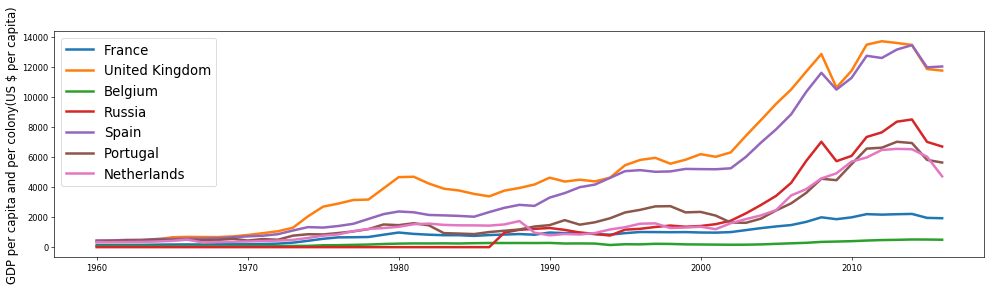

In [211]:
import matplotlib.pyplot as plt
x = np.linspace(1960,2016, 57)

plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
plt.plot(x, france.values,linewidth=3.0)
plt.plot(x, uk.values,linewidth=3.0)
plt.plot(x, belgium.values,linewidth=3.0)
plt.plot(x, russia.values,linewidth=3.0)
plt.plot(x, spain.values,linewidth=3.0)
plt.plot(x, portugal.values,linewidth=3.0)
plt.plot(x, netherland.values,linewidth=3.0)
plt.ylabel('GDP per capita and per colony(US $ per capita)',fontsize = 14)
plt.legend(['France', 'United Kingdom', 'Belgium','Russia','Spain','Portugal','Netherlands'],fontsize = 16)
plt.savefig("gdp.svg", format="svg")
plt.show()

## Conflicts per colonizer

In [196]:
conflict = pd.read_csv('colonization_conflict_year_colon_countries_gen.csv')
conflict = conflict.drop(['Unnamed: 0', 'Denmark'], axis = 1)

number_colonies = [4.0, 27.0, 3.0, 2.0, 7.0, 13.0, 20.0, 49.0]

column_ = 0
for column in conflict:
    if column_ < 8:
        conflict[column] = conflict[column]/number_colonies[column_]
    
    column_ += 1

conflict['Date'] = pd.to_datetime(conflict['Year'],format='%Y')
#conflict = conflict.set_index('Year')
conflict = conflict.set_index('Date')
conflict.head()

,Belgium,France,Italy,Netherlands,Portugal,Russia,Spain,United_Kingdom,Year
Date,,,,,,,,,
1945-01-01,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1945
1946-01-01,0.0,0.111111,0.0,0.5,0.0,0.0,0.1,0.020408,1946
1947-01-01,0.0,0.148148,0.0,0.5,0.0,0.0,0.1,0.000000,1947
1948-01-01,0.0,0.111111,0.0,0.5,0.0,0.0,0.1,0.122449,1948
1949-01-01,0.0,0.111111,0.0,0.5,0.0,0.0,0.1,0.183673,1949


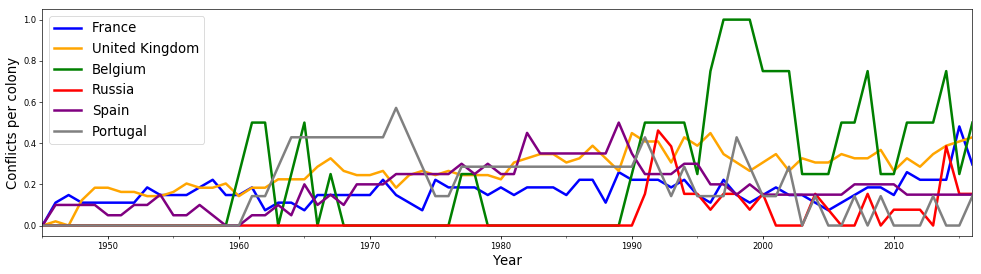

In [212]:

plt.figure(figsize=(20,5), dpi=60, facecolor='w', edgecolor='k')
conflict['France'].plot(color='blue',linewidth=3.0)
conflict['United_Kingdom'].plot(color='orange',linewidth=3.0)
conflict['Belgium'].plot(color='green',linewidth=3.0)
conflict['Russia'].plot(color='red',linewidth=3.0)
conflict['Spain'].plot(color='purple',linewidth=3.0)
conflict['Portugal'].plot(color='grey',linewidth=3.0)


#conflict['Italy'].plot(color='grey')
plt.ylabel('Conflicts per colony',fontsize = 16)
plt.xlabel('Year',fontsize = 16)
plt.legend(['France','United Kingdom','Belgium', 'Russia', 'Spain', 'Portugal'],fontsize = 16)
plt.savefig("conpercol.svg", format="svg")
plt.show()

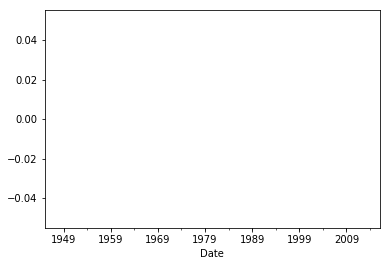

In [207]:
tsres = conflict.resample('M')
tsint = tsres.interpolate(method='cubic')
tsint['France'].plot()
plt.show()

In [204]:
tsint

,Belgium,France,Italy,Netherlands,Portugal,Russia,Spain,United_Kingdom,Year
Date,,,,,,,,,
1945-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1945-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
